## 1. What does RGBA stand for?

RGBA(Red-Green-Blue-Alpha): The RGB color model is extended in this specification to include “alpha” to allow specification of the opacity of a color.

The format of the RGBA Value
1. rgba(R,G,B,A) -integer-
The format of an RGBA value in the functional notation is ‘rgba(’ followed by a comma-separated list of three numerical values (three integer values), followed by an <alphavalue>, followed by ‘)’.

2. rgba(R,G,B,A) -percentage-
The format of an RGBA value in the functional notation is ‘rgba(’ followed by a comma-separated list of three numerical values (three percentage values), followed by an <alphavalue>, followed by ‘)’.

## 2. From the Pillow module, how do you get the RGBA value of any images?

In [16]:
from PIL import Image
import collections

In [18]:
imgobj = Image.open(r'C:\Users\lenovo\OneDrive\Pictures\Screenshots\Screenshot (1).png')
pixels = imgobj.convert('RGBA')
data = imgobj.getdata()
counts = collections.Counter(data)
counts

Counter({(0, 0, 0, 255): 1041845,
         (0, 9, 15, 255): 4,
         (1, 43, 73, 255): 6,
         (1, 73, 122, 255): 4,
         (1, 97, 164, 255): 4,
         (2, 117, 197, 255): 4,
         (2, 132, 223, 255): 2,
         (2, 142, 240, 255): 4,
         (2, 147, 248, 255): 2,
         (0, 19, 32, 255): 6,
         (1, 68, 114, 255): 2,
         (2, 112, 189, 255): 4,
         (2, 148, 249, 255): 1583,
         (1, 102, 172, 255): 2,
         (1, 58, 98, 255): 2,
         (2, 125, 211, 255): 4,
         (1, 90, 152, 255): 4,
         (1, 61, 102, 255): 4,
         (0, 37, 62, 255): 2,
         (0, 7, 11, 255): 4,
         (0, 1, 1, 255): 2,
         (1, 88, 147, 255): 2,
         (0, 25, 42, 255): 2,
         (1, 107, 181, 255): 2,
         (2, 114, 191, 255): 2,
         (1, 49, 82, 255): 2,
         (11, 18, 22, 255): 2,
         (2, 131, 221, 255): 2,
         (1, 55, 92, 255): 2,
         (13, 13, 13, 255): 12,
         (162, 162, 162, 255): 12,
         (117, 148, 170, 255): 

In Pillow, RGBA values are represented by a tuple of four integer values. For example, the color red is represented by (255, 0, 0, 255). This color has the maximum amount of red, no green or blue, and the maximum alpha value, meaning it is fully opaque. Green is represented by (0, 255, 0, 255), and blue is (0, 0, 255, 255). White, the combination of all colors, is (255, 255, 255, 255), while black, which has no color at all, is (0, 0, 0, 255).

If a color has an alpha value of 0, it is invisible, and it doesn’t really matter what the RGB values are. After all, invisible red looks the same as invisible black.

## 3. What is a box tuple, and how does it work?

Many of Pillow’s functions and methods take a box tuple argument. This means Pillow is expecting a tuple of four integer coordinates that represent a rectangular region in an image. The four integers are, in order, as follows:

- Left The x-coordinate of the leftmost edge of the box.

- Top The y-coordinate of the top edge of the box.

- Right The x-coordinate of one pixel to the right of the rightmost edge of the box. This integer must be greater than the left integer.

- Bottom The y-coordinate of one pixel lower than the bottom edge of the box. This integer must be greater than the top integer.

Note that the box includes the left and top coordinates and goes up to but does not include the right and bottom coordinates. 

## 4. Use your image and load in notebook then, How can you find out the width and height of an Image object?

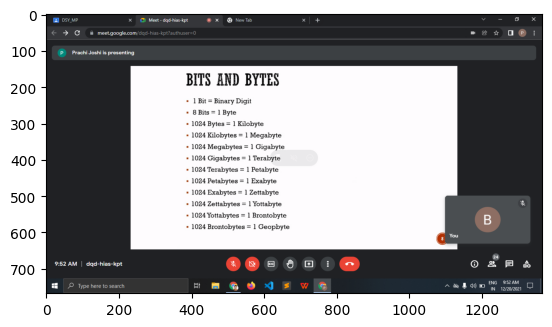

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\lenovo\OneDrive\Pictures\Screenshots\Screenshot (3).png')
imgplot = plt.imshow(img)
plt.show()

In [23]:
img = Image.open(r'C:\Users\lenovo\OneDrive\Pictures\Screenshots\Screenshot (3).png')
print(f"The height of image is: {img.height}, The width of image is {img.width}")
print(f'Size: {img.sizee}')

The height of image is: 768, The width of image is 1366
Size: (1366, 768)


## 5. What method would you call to get Image object for a 100×100 image, excluding the lower-left quarter of it?

In [24]:
# Get the width and height of the image
width, height = img.size

# Define the box to keep
box = (0, 0, width / 2, height / 2)

# Crop the image
cropped_img = img.crop(box)

# Show the cropped image
cropped_img.show()

## 6. After making changes to an Image object, how could you save it as an image file?

- Image.save() Saves this image under the given filename. If no format is specified, the format to use is determined from the filename extension, if possible.

- Keyword options can be used to provide additional instructions to the writer. If a writer doesn’t recognise an option, it is silently ignored. The available options are described in the image format documentation for each writer.

- You can use a file object instead of a filename. In this case, you must always specify the format. The file object must implement the seek, tell, and write methods, and be opened in binary mode. 

Syntax: Image.save(fp, format=None, **params)

In [26]:
cropped_img.save('croped_img.png')

## 7. What module contains Pillow’s shape-drawing code?

- The ‘ImageDraw’ module provides simple 2D graphics support for Image Object. Generally, we use this module to create new images, annotate or retouch existing images and to generate graphics on the fly for web use.

- The graphics commands support the drawing of shapes and annotation of text.

In [27]:
from PIL import Image, ImageDraw

#Create Image object


#Draw line
draw = ImageDraw.Draw(img)
draw.line((0, 0) + img.size, fill=128)
draw.line((0, img.size[1], img.size[0], 0), fill=128)

#Show image
img.show()

Canvas
- An ImageDraw is a Pillow drawable surface (i.e., a canvas) of an Image.
- ImageDraw.Draw(img) returns a drawable canvas representation of Image parameter img. The background of the canvas is the "img" image.

In [2]:
#Import required modules from Pillow package
from PIL import Image, ImageDraw, ImageFont

# get an image
base = Image.open(r'C:\Users\lenovo\OneDrive\Pictures\Screenshots\Screenshot (3).png').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((14,14), "Tutorials", fill=(255,255,255,128))

# draw text, full opacity
d.text((14,60), "Point", fill=(255,255,255,255))
out = Image.alpha_composite(base, txt)

#Show image
out.show()

## 8. Image objects do not have drawing methods. What kind of object does? How do you get this kind of object?

The ImageDraw class in the Python Imaging Library (PIL), also known as Pillow, provides drawing methods for creating and editing images.

In [4]:
from PIL import Image, ImageDraw

# Open an image file
im = Image.open(r'C:\Users\lenovo\OneDrive\Pictures\Screenshots\Screenshot (3).png')

# Create an ImageDraw object
draw = ImageDraw.Draw(im)


ImageDraw object, you can use its various drawing methods to add shapes, lines, text, and other elements to the image.

In [8]:
# Draw a line
draw.line((0, 0) + im.size, fill=128)

# Draw a rectangle
draw.rectangle((0, 0, 50, 50), fill=(255, 0, 0))

# Draw an ellipse
draw.ellipse((0, 0, 100, 100), fill=(0, 255, 0))

# Draw some text
draw.text((0, 0), "Hello, World!", fill=(0, 0, 255))
im.show()